In [1]:
#Imports
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Carregando dados
df_dados = pd.read_csv('train.csv',delimiter=',')

#df_dados = df_dados.sample(frac=1)

df_dados

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


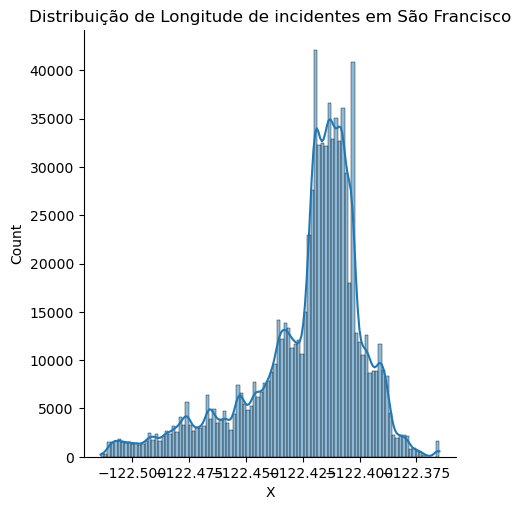

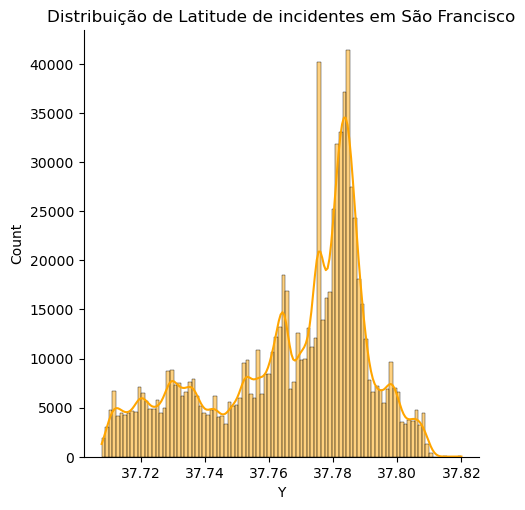

In [3]:
#plt.scatter(df_dados['X'], df_dados['Y'])
dadosLimpos = df_dados[df_dados['X'] <= -120.8]
plot1 = sns.displot(dadosLimpos['X'], kde=True, bins=100).set(title='Distribuição de Longitude de incidentes em São Francisco')
plot2 = sns.displot(dadosLimpos['Y'], kde=True, bins=100, color = 'orange').set(title='Distribuição de Latitude de incidentes em São Francisco')


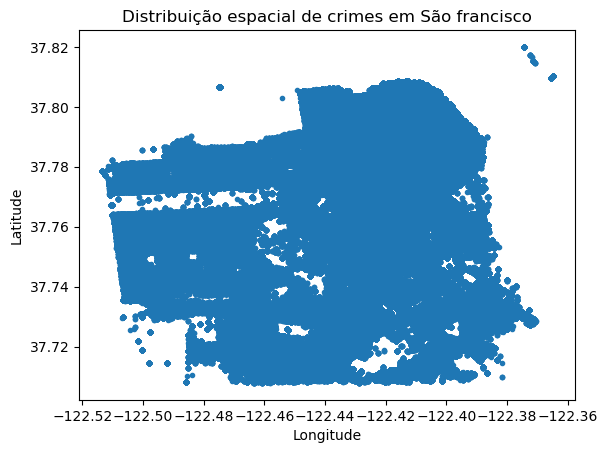

In [4]:
plt.scatter(dadosLimpos['X'], dadosLimpos['Y'].array,marker='.')

plt.title('Distribuição espacial de crimes em São francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()




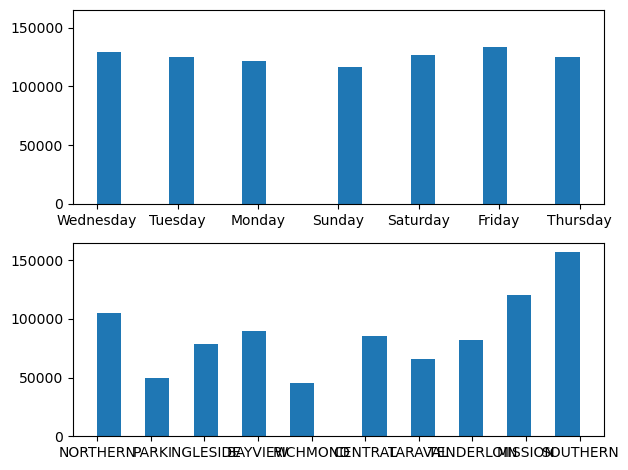

In [18]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dadosLimpos['DayOfWeek'], bins=20)
axs[1].hist(dadosLimpos['PdDistrict'], bins=20)

plt.show()

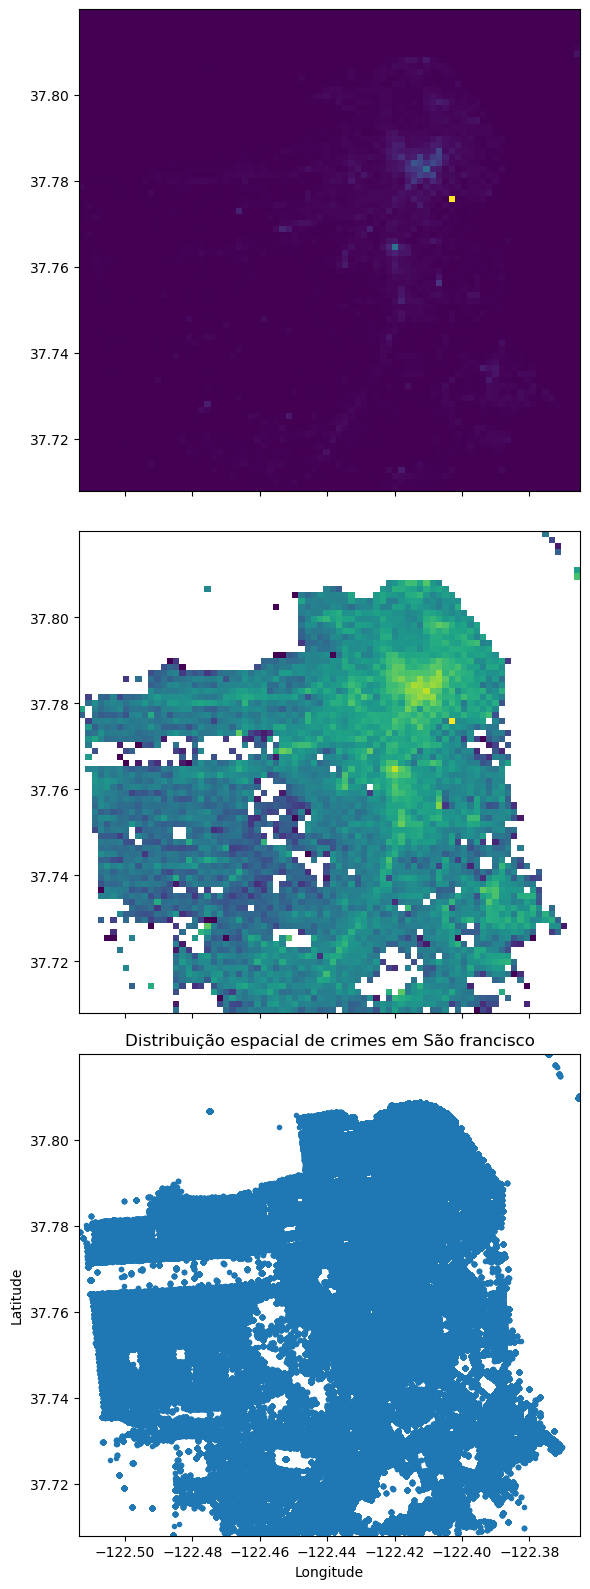

In [26]:
fig, axs = plt.subplots(3, 1, figsize=(6, 16), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(dadosLimpos['X'], dadosLimpos['Y'], bins = 80)

# As well as define normalization of the colors
axs[1].hist2d(dadosLimpos['X'], dadosLimpos['Y'], bins = 80, norm=colors.LogNorm())

axs[2].scatter(dadosLimpos['X'], dadosLimpos['Y'].array,marker='.')

plt.title('Distribuição espacial de crimes em São francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()